In [51]:
%matplotlib notebook
%precision 3

from IPython.display import set_matplotlib_formats
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import matplotlib

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.rcParams['figure.figsize'] = [9, 5]

import pandas

from datetime import datetime

In [52]:
df=[]
df.append(pandas.read_csv("8.8.8.8.csv"))
df.append(pandas.read_csv("78.33.253.139.csv"))
data = pandas.concat(df, axis=0, ignore_index=True)
data["timestamp"]=pandas.to_datetime(data["UTIME"], unit='s')
data.set_index("timestamp", inplace=True)
data.sort_index(inplace=True)

data

,IP,SEQ,RTT,UTIME
timestamp,,,,
2020-07-03 05:01:39,8.8.8.8,1,7.39,1593752499
2020-07-03 05:01:49,8.8.8.8,2,8.01,1593752509
2020-07-03 05:01:57,78.33.253.139,1,8.75,1593752517
2020-07-03 05:01:59,8.8.8.8,3,6.93,1593752519
2020-07-03 05:02:07,78.33.253.139,2,10.20,1593752527
...,...,...,...,...
2020-07-03 15:59:03,78.33.253.139,3888,8.29,1593791943
2020-07-03 15:59:13,78.33.253.139,3889,7.49,1593791953
2020-07-03 15:59:13,8.8.8.8,3888,7.82,1593791953


<IPython.core.display.Javascript object>


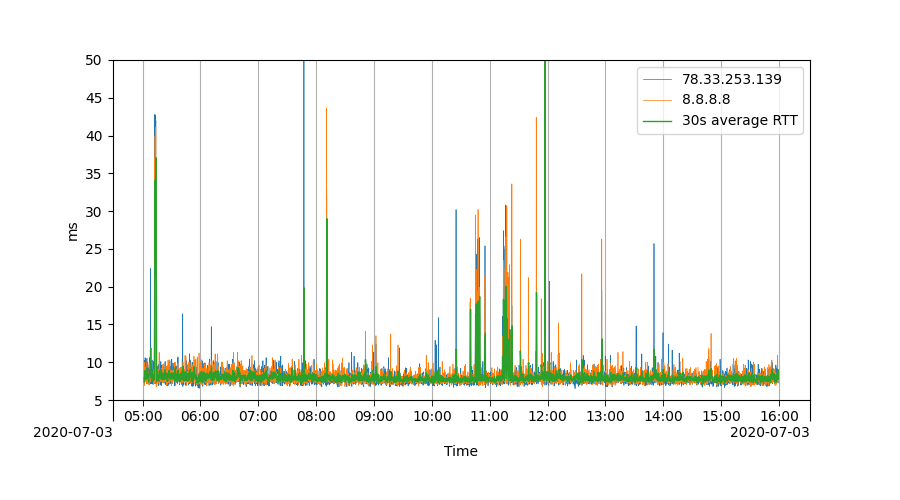

In [54]:
plt.figure()
period = "30s"

plt.plot(data[data.IP == '78.33.253.139']["RTT"], label='78.33.253.139', linewidth=0.5)
plt.plot(data[data.IP == '8.8.8.8']["RTT"], label='8.8.8.8', linewidth=0.5)

avgRTT=data["RTT"].rolling(period)
avgRTT.mean().plot(label=period +" average RTT", linewidth=1)


plt.ylabel("ms");
plt.xlabel("Time")

ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%H:%M"))
ax.xaxis.set_minor_locator(mdates.HourLocator())
ax.xaxis.grid(True, which='minor')

ax.set_ylim(5, 50)  # outliers only

ax.tick_params(axis='x', which='major', length=15)
ax.tick_params(axis='x', which='minor', length=4)
plt.xticks(rotation=0)
plt.legend()
